## Второе задание. Метод момента

In [1]:
import numpy as np

np.random.seed(23)

Реализовать Метод момента.

![](Momentum.png)

([Картинка отсюда](https://cs231n.github.io/neural-networks-3/))

Сравнить его с методом Нестерова и методом градиентного спуска, которые были преддставлены на семинаре. Сравнивать можно на $2D$  задаче с семинара

In [2]:
from optimizers.GD import GD, NesterovGD, MomentumGD

%load_ext autoreload
%autoreload 2

In [3]:
n = 100

# строим и нормализуем матрицу
A = np.array([[4,3], [3,4]])
U = np.random.rand(2, 2)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5

n_points = 100

u = np.linspace(-4, 4, n_points)
x, y = np.meshgrid(u, u)
b = np.random.rand(2)
X = np.vstack([x.flatten(), y.flatten()])

# строим изолинии
f_x = X.T @ A @ X - b @ X

f_x = np.diag(f_x).reshape(n_points, n_points)

# начальное приближение
x0 = np.array([-4. , -4.])

# вспомогательные функции для кастомного Gradient DEscent
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b

In [4]:
finish_gd, score_gd, hist_gd = GD(f, grad_f, x0, rho=0.5, beta1=0.2).optimize()

gd_iter = len(hist_gd["x"])
print('Simple Gradient Descent finished after {} iterations'.format(gd_iter))
print('Best: {} with score {}'.format(finish_gd, score_gd))

Simple Gradient Descent finished after 71 iterations
Best: [-0.07127272  0.62967031] with score 9.433065185495247e-09


In [5]:
finish_ngd, score_ngd, hist_ngd = NesterovGD(f, grad_f, x0, momentum=0.3, rho=0.5, beta1=0.2).optimize()

ngd_iter = len(hist_ngd["x"])
print('Nesterov Gradient Descent finished after {} iterations'.format(ngd_iter))
print('Best: {} with score {}'.format(finish_ngd, score_ngd))

Nesterov Gradient Descent finished after 40 iterations
Best: [-0.07127272  0.62967032] with score 7.017752304516695e-09


In [6]:
finish_mgd, score_mgd, hist_mgd = MomentumGD(f, grad_f, x0, momentum=0.3, rho=0.5, beta1=0.2).optimize()

mgd_iter = len(hist_mgd["x"])
print('Momentum Gradient Descent finished after {} iterations'.format(ngd_iter))
print('Best: {} with score {}'.format(finish_mgd, score_mgd))

Momentum Gradient Descent finished after 40 iterations
Best: [-0.07127272  0.62967032] with score 5.846419437154602e-09


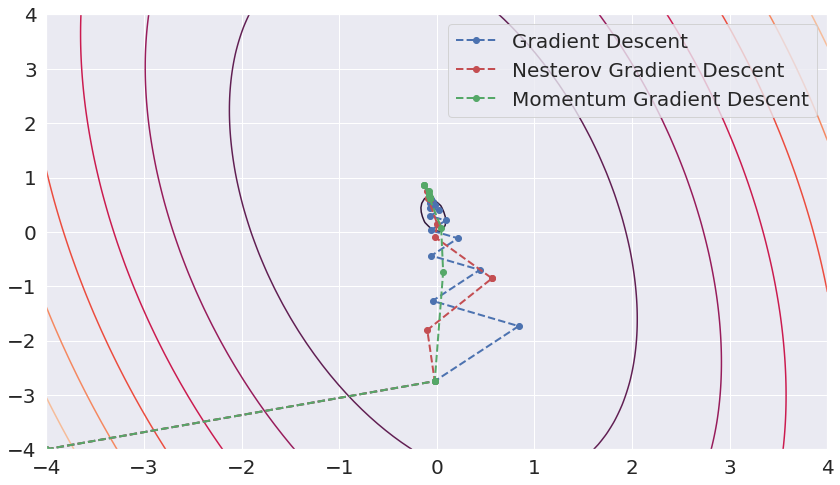

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

x_gd, y_gd = np.array(hist_gd["x"]).T
x_ngd, y_ngd = np.array(hist_ngd["x"]).T
x_mgd, y_mgd = np.array(hist_mgd["x"]).T

sns.set()
plt.figure(figsize = (14, 8))

plt.plot(x_gd, y_gd, '--bo',linewidth=2, label='Gradient Descent')
plt.plot(x_ngd, y_ngd, '--ro',linewidth=2, label='Nesterov Gradient Descent')
plt.plot(x_mgd, y_mgd, '--go',linewidth=2, label='Momentum Gradient Descent')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)

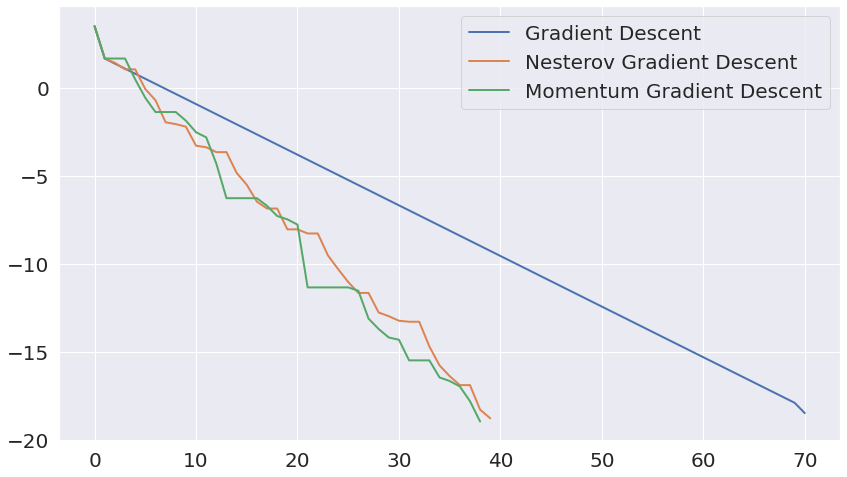

In [8]:
it_gd = np.arange(gd_iter)
scores_gd = hist_gd["scores"]

it_ngd = np.arange(ngd_iter)
scores_ngd = hist_ngd["scores"]

it_mgd = np.arange(mgd_iter)
scores_mgd = hist_mgd["scores"]

sns.set()
plt.figure(figsize = (14, 8))

plt.plot(it_gd, np.log(scores_gd), linewidth=2, label='Gradient Descent')
plt.plot(it_ngd, np.log(scores_ngd), linewidth=2, label='Nesterov Gradient Descent')
plt.plot(it_mgd, np.log(scores_mgd), linewidth=2, label='Momentum Gradient Descent')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

__Вывод:__ Как мы видим, метод Моментов и метод Нестерова ускоряют градиентный спуск +- одинаково быстро. Однако стоит аккуратно выбирать значение момента, т.к. при больших значениях алгоритм может не сойтись (или сходиться дольше, чем стандартный GD).